In [1]:
import signac
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_rdf_data(file, rdf_type):
    data = np.genfromtxt(file, names=True, delimiter=",")
    x = data['{}_x'.format(rdf_type)]
    y = data['{}_y'.format(rdf_type)]
    return x, y

In [3]:
ptb7_project = signac.get_project()
itic_project = signac.get_project(root='/home/chris/cme/projects/itic-project/small-system-sweep')

In [58]:
# PLOTS PTB7 AT A SINGLE DENSITY --> RDF AS A FUNCTION OF TEMP
%matplotlib qt
plt.rcParams['axes.linewidth'] = 1.6 #set the value globally
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.width'] = 1.6
plt.rc('axes', labelsize=22)
plt.rc('legend', title_fontsize=18)
polymer_length = 5
state_dict = {"size": "small", "process": "quench", "density":0.8, "molecule":"PTB7_{}mer_smiles".format(polymer_length)}
low_density_jobs = ptb7_project.find_jobs(filter=state_dict)
job_temps = [job.sp['kT_reduced'] for job in low_density_jobs]
print(job_temps)
job_temps.sort()
print(job_temps)

colors = plt.cm.coolwarm(np.linspace(0, 1, len(job_temps)))
fig = plt.figure()
ax = plt.subplot(111)
for idx, T in enumerate(job_temps):
    for job in low_density_jobs:
        if job.sp['kT_reduced'] == T:
            file_path = os.path.join(job.workspace(), 'rdf-data.txt')
            x, y = get_rdf_data(file_path, rdf_type='sulfur')
            ax.plot(x, y, label=job.sp['kT_reduced'], color=colors[idx], linewidth=5)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='kT', fontsize='x-large')
plt.xlim(0, 4.5)
plt.xlabel('distance r (A.U.)')
plt.ylabel('G(r)')

[1.8, 1.7, 2.3, 1.5, 1.4, 2.0, 2.2, 1.9, 2.4, 1.6, 2.1]
[1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]


Text(0, 0.5, 'G(r)')

In [34]:
state_dict = {"size": "small", "process": "quench", "density":0.8, "kT_reduced":1.4}
length_jobs = ptb7_project.find_jobs(filter=state_dict)
length_jobs

/home/chris/miniconda3/envs/opv/lib/python3.7/site-packages/signac/contrib/project.py:1912: UserWarning: Install pandas for a pretty representation of jobs.
  warnings.warn('Install pandas for a pretty representation of jobs.')


JobsCursor(project=Project.get_project('/home/chris/cme/projects/ptb7-project'), filter={'size': 'small', 'process': 'quench', 'density': 0.8, 'kT_reduced': 1.4}, doc_filter=None)

In [57]:
state_dict = {"size": "small", "process": "quench", "density":0.8, "kT_reduced":1.4}
length_jobs = ptb7_project.find_jobs(filter=state_dict)

colors = plt.cm.coolwarm(np.linspace(0, 1, len(job_temps)))
fig = plt.figure()
#ax = plt.subplot(111)
molecules = ['PTB7_5mer_smiles', 'PTB7_10mer_smiles','PTB7_15mer_smiles']
marker_styles = ['s', 'o', 't']
line_styles = ['-', '--', ':']
job_lengths = ['5', '10', '15']
for i, L in enumerate(job_lengths):
    for job in length_jobs:
        if job.sp['molecule'] == molecules[i]:
            file_path = os.path.join(job.workspace(), 'rdf-data.txt')
            x, y = get_rdf_data(file_path, rdf_type='sulfur')
            plt.plot(x, y,
                    label=job_lengths[i],
                    linestyle=line_styles[i],
                    linewidth=6
                   )
    
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
plt.legend(title='Polymer Length')
plt.xlim(0, 4.5)
plt.xlabel('distance r (A.U.)')
plt.ylabel('G(r)')

Text(0, 0.5, 'G(r)')

## PTB7 VS ITIC CENTERS PLOT:

The code below here is creating a single plot comparing PTB7 vs ITIC (centers) at a single statepoint

In [59]:
ptb7_dict = {"size": "small",
             "process": "quench",
             "density":0.8,
             "molecule":"PTB7_5mer_smiles",
            "kT_reduced":1.4}

itic_dict = {"density": 0.8, "kT_reduced":1.4}

In [66]:
ptb7_job = ptb7_project.find_jobs(ptb7_dict)
ptb7_path = [job.workspace() for job in ptb7_job]
ptb7_rdf = os.path.join(ptb7_path[0], 'rdf-data.txt')
ptb7_x, ptb7_y = get_rdf_data(ptb7_rdf, 'centers')

itic_job = itic_project.find_jobs(itic_dict)
itic_path = [job.workspace() for job in itic_job]
itic_rdf = os.path.join(itic_path[0], 'rdf-data.txt')
itic_x, itic_y = get_rdf_data(itic_rdf, 'centers')

fig = plt.figure()
plt.plot(ptb7_x, ptb7_y, label="PTB7", linewidth=5)
plt.plot(itic_x, itic_y, label="ITIC", linewidth=5)
plt.xlabel('distance r (A.U.)')
plt.ylabel('G(r)')
plt.legend()

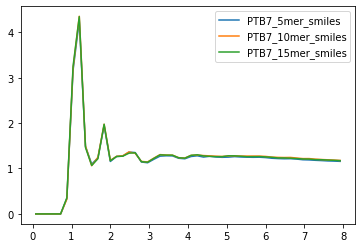

In [48]:
polymer_length = 5
fig = plt.figure()

job_list = []

for job in low_density_jobs:
    if job.sp['molecule'] == "PTB7_{}mer_smiles".format(polymer_length):
        file_path = "{}/rdf-data.txt".format(job.workspace())
        file_path = os.path.join(job.workspace(), 'rdf-data.txt')
        x, y = get_rdf_data(file_path, rdf_type='sulfur')
        plt.plot(x, y, label=job.sp['molecule'])

plt.legend()